## Heat Content (.htcon) to csv converter

- bring in 6hourly htcon file and convert time word to datestamp
- pjs has used hours from 1995-1-1 as the basedate
- combine defined climatology and calculate anom

Outputs - 6ihourly data

In [235]:
import pandas as pd
import datetime
import os

%matplotlib inline

In [236]:
#read in standard htcon file, convert to datetime and setup index
num_depths = 74

path = '/Users/bell/in_and_outbox/Ongoing_Analysis/M2_IntegratedTemp/20191101_erddap_dataset/htcon_orig/'
filein = path + '17bsm2a_final2.htcon'

df = pd.read_csv(filein,delimiter='\s+',names=['hour_elapsed','total_heatcontent','num_depths'])

base_date = datetime.datetime(1995,1,1)
df['datetime'] = [base_date + datetime.timedelta(hours=row['hour_elapsed']) for index, row in df.iterrows()]
df['depthintegrated_heatcontent'] = df['total_heatcontent'] / num_depths

df = df.set_index(pd.DatetimeIndex(df['datetime']))
df = df.drop(columns='datetime')
df['doy'] = df.index.dayofyear
df['dayhour'] = df.index.hour


In [237]:
sorted(os.listdir(path))

['.DS_Store',
 '02bsm2a_f29.htcon',
 '03bs2a_brg_f29_updt.htcon',
 '04bs2c_brg_f29_updt.htcon',
 '04bsm2a_brg_f29_updt.htcon',
 '05bs2c_brg_f29_updt.htcon',
 '05bsm2a_f29_updt.htcon',
 '06bs2c_brg_f29_point.htcon',
 '06bsm2a_f29_point.htcon',
 '07bs2c_brg_f29_point.htcon',
 '07bsm2a_f29_point.htcon',
 '08bs2c_f29_point.htcon',
 '08bsm2a_f29_point.htcon',
 '09bsm2a_f29_point.htcon',
 '10bs2c_f29_point.htcon',
 '10bsm2a_point.htcon',
 '10ctd.htcon',
 '11bs2c_f29_point.htcon',
 '11bsm2a_brg_f29_point.htcon',
 '12bs2c_f29_point.htcon',
 '12bsm2a_brg_f29_point.htcon',
 '13bs2c_inter.htcon',
 '13bsm2a_brg_f35_point.htcon',
 '14bs2c_brg_f29_all.htcon',
 '14bs2c_brg_f29_point_all.htcon',
 '14bsm2_rev_brg_f29.htcon',
 '14bsm2a_f29_point.htcon2.bad',
 '15bsm2_f29_temporary.nc',
 '15bsm2_f29_temporary.nc.csv',
 '15bsm2a_brg_f29.htcon',
 '15bsm2c_brg_f29_tempor.htcon',
 '16bs2c_brg_tempory.htcon',
 '16bsm2a_garbage.htcon',
 '17bsm2a_final2.htcon',
 '2006_2015.htcon',
 'bsm2_2001.htcon',
 'bsm2_200

In [238]:
#read in climatology and combine with .htcon based on doy

climo_filein = '/Users/bell/in_and_outbox/Ongoing_Analysis/M2_IntegratedTemp/20191101_erddap_dataset/climatology.csv'

df_c = pd.read_csv(climo_filein,delimiter=',',parse_dates=True,index_col='datetime')
df_c['climatology_depthintegrated_heatcontent'] = df_c['climatology_total_heatcontent'] / num_depths
df_c['doy'] = df_c.index.dayofyear
df_c['dayhour'] = df_c.index.hour

#drop feb 29 for non-leap years
df_c_noleap = df_c[df_c.index.dayofyear!=60]
df_c_noleap['doy'][df_c_noleap.index.dayofyear>60] = df_c_noleap[df_c_noleap.index.dayofyear>60]['doy'] -1


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [239]:
if df_c.index.is_leap_year[0]:
    mergedDf = df.merge(df_c, on=['doy','dayhour'], left_index=True)
else:
    mergedDf = df.merge(df_c_noleap, on=['doy','dayhour'], left_index=True)

mergedDf['anom'] = mergedDf['depthintegrated_heatcontent']-mergedDf['climatology_depthintegrated_heatcontent']

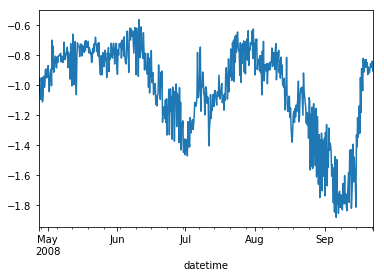

In [240]:
mergedDf['anom'].plot()

In [241]:
fileout = '/Users/bell/in_and_outbox/Ongoing_Analysis/M2_IntegratedTemp/20191101_erddap_dataset/htcon_csv/'
fileout = fileout + filein.split('/')[-1].replace('htcon','htcon.csv')
mergedDf.to_csv(fileout)